In [ ]:
#imports

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, Dropout
from keras import Model
from tensorflow.keras import optimizers

In [ ]:
!gdown --id 1w5l-11wOWuMwDmRCEul4jgIaHDtOPQFP
!unzip AID_mini

Downloading...
From: https://drive.google.com/uc?id=1w5l-11wOWuMwDmRCEul4jgIaHDtOPQFP
To: /content/AID_mini.zip
65.8MB [00:00, 80.8MB/s]
Archive:  AID_mini.zip
   creating: test/
   creating: test/Airport/
  inflating: test/Airport/airport_135.jpg  
  inflating: test/Airport/airport_136.jpg  
  inflating: test/Airport/airport_137.jpg  
  inflating: test/Airport/airport_138.jpg  
  inflating: test/Airport/airport_139.jpg  
  inflating: test/Airport/airport_14.jpg  
  inflating: test/Airport/airport_140.jpg  
  inflating: test/Airport/airport_141.jpg  
  inflating: test/Airport/airport_142.jpg  
  inflating: test/Airport/airport_143.jpg  
  inflating: test/Airport/airport_144.jpg  
  inflating: test/Airport/airport_145.jpg  
  inflating: test/Airport/airport_146.jpg  
  inflating: test/Airport/airport_147.jpg  
  inflating: test/Airport/airport_148.jpg  
  inflating: test/Airport/airport_149.jpg  
  inflating: test/Airport/airport_15.jpg  
  inflating: test/Airport/airport_150.jpg  
  in

In [ ]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

# **Without Data augmentation and Dropout**

## **Random initialization weights**

In [ ]:
# data preparation

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train generator
train_generator = train_datagen.flow_from_directory(
                  'train',              # Target directory
                  batch_size=20,
                  class_mode='categorical')

# validation generator
validation_generator = test_datagen.flow_from_directory(
                       'test',         # Target directory
                       batch_size=20,
                       class_mode='categorical')

Found 1200 images belonging to 30 classes.
Found 600 images belonging to 30 classes.


In [ ]:
# build model

conv_base = keras.applications.Xception(include_top=False,
                                        input_shape=(256, 256, 3),
                                        weights=None)

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

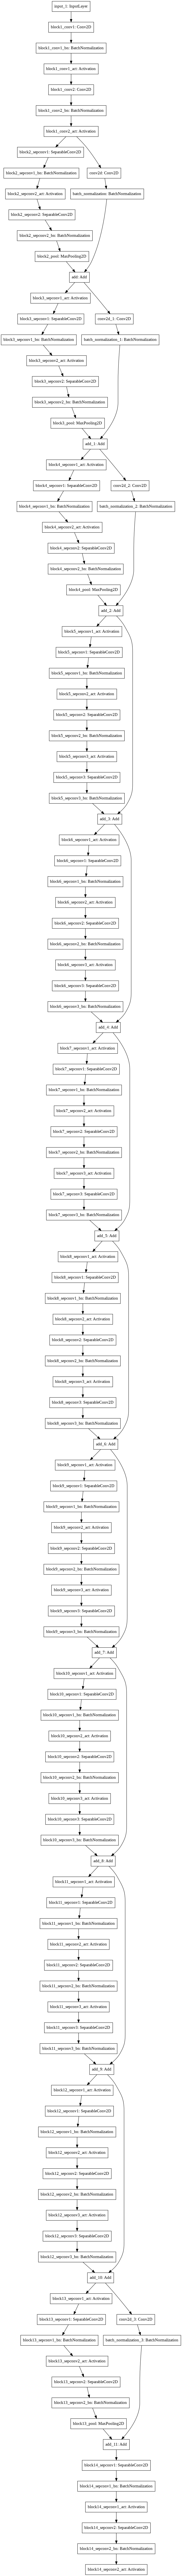

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(conv_base, to_file='Xception.png')

In [ ]:
model_no1 = Sequential()
model_no1.add(Input(shape=(256, 256, 3)))
model_no1.add(conv_base)
model_no1.add(Flatten())
model_no1.add(Dense(256, activation='relu'))
model_no1.add(Dense(30, activation='softmax'))

model_no1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 54,369,350
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model_no1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
path_checkpoint = "random_ini_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no1 = model_no1.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 79s 524ms/step - loss: 12.3654 - acc: 0.0400 - val_loss: 3.4012 - val_acc: 0.0333

Epoch 00001: val_acc improved from -inf to 0.03333, saving model to random_ini_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 31s 521ms/step - loss: 3.4339 - acc: 0.0566 - val_loss: 3.4010 - val_acc: 0.0350

Epoch 00002: val_acc improved from 0.03333 to 0.03500, saving model to random_ini_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 32s 534ms/step - loss: 3.1128 - acc: 0.1657 - val_loss: 3.4016 - val_acc: 0.0383

Epoch 00003: val_acc improved from 0.03500 to 0.03833, saving model to random_ini_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 33s 545ms/step - loss: 2.9037 - acc: 0.1617 - val_loss: 3.4013 - val_acc: 0.0250

Epoch 00004: val_acc did not improve from 0.03833
Epoch 5/100
60/60 [==============================] - 33s 545ms/step - loss: 2.5721 - acc: 0.2828 - val_loss: 3.3997 - val_ac

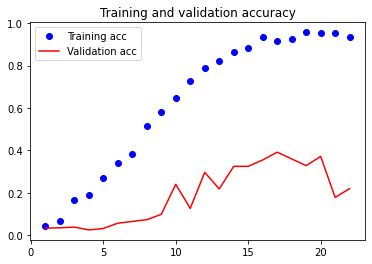

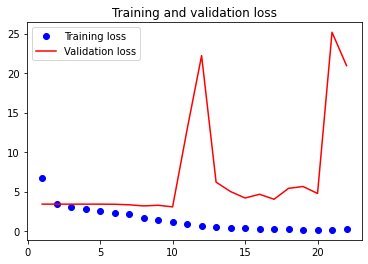

In [ ]:
plot_history(history_no1)

## **Feature Extractor - 1**

In [ ]:
# build model

conv_base = keras.applications.Xception(include_top=False,
                                        input_shape=(256, 256, 3),
                                        weights='imagenet')

conv_base.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
import os
import numpy as np


base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 8, 8, 2048))
  labels = np.zeros(shape=(sample_count, 30))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(256, 256),
                                          batch_size=batch_size,
                                          class_mode='categorical')
  
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    # Note that because generators yield data indefinitely in a loop,
    # you must break after every image has been seen once
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 1200)
validation_features, validation_labels = extract_features(validation_dir, 600)

Found 1200 images belonging to 30 classes.
Found 600 images belonging to 30 classes.


In [ ]:
train_features = np.reshape(train_features, (1200, 8 * 8 * 2048))
validation_features = np.reshape(validation_features, (600, 8 * 8 * 2048))

In [ ]:
model_no2 = Sequential()
model_no2.add(Dense(256, activation='relu', input_dim=8*8*2048))
model_no2.add(Dense(30, activation='softmax'))

model_no2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 33,562,398
Trainable params: 33,562,398
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_no2.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "feature_extractor1_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


history_no2 = model_no2.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels),
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 2s 30ms/step - loss: 2.5223 - acc: 0.3474 - val_loss: 1.1580 - val_acc: 0.6767

Epoch 00001: val_acc improved from -inf to 0.67667, saving model to feature_extractor1_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 1s 23ms/step - loss: 0.3638 - acc: 0.9233 - val_loss: 0.8859 - val_acc: 0.7450

Epoch 00002: val_acc improved from 0.67667 to 0.74500, saving model to feature_extractor1_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 1s 22ms/step - loss: 0.0718 - acc: 0.9919 - val_loss: 0.9003 - val_acc: 0.7450

Epoch 00003: val_acc did not improve from 0.74500
Epoch 4/100
60/60 [==============================] - 1s 24ms/step - loss: 0.0233 - acc: 1.0000 - val_loss: 0.7428 - val_acc: 0.7833

Epoch 00004: val_acc improved from 0.74500 to 0.78333, saving model to feature_extractor1_checkpoint.h5
Epoch 5/100
60/60 [==============================] - 1s 22ms/step - loss: 0.0078 - acc: 0.9993 - val_loss: 0.

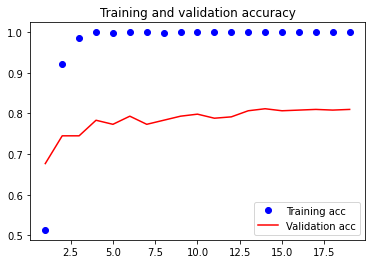

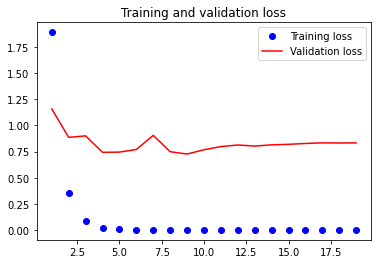

In [ ]:
plot_history(history_no2)

## **Feature Extractor - 2**

In [ ]:
# build model

conv_base = keras.applications.Xception(include_top=False,
                                        input_shape=(256, 256, 3),
                                        weights='imagenet')

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = conv_base(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(30, activation='softmax')(x)

model_no3 = keras.Model(inputs, outputs)

In [ ]:
conv_base.trainable = False

model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 33,562,398
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
freeze_path_checkpoint = "feature_extractor2_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=freeze_path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no3 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 14s 192ms/step - loss: 1.7913 - acc: 0.5225 - val_loss: 1.0904 - val_acc: 0.7083

Epoch 00001: val_acc improved from -inf to 0.70833, saving model to feature_extractor2_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 11s 187ms/step - loss: 0.3260 - acc: 0.9308 - val_loss: 0.9271 - val_acc: 0.7283

Epoch 00002: val_acc improved from 0.70833 to 0.72833, saving model to feature_extractor2_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 12s 193ms/step - loss: 0.0800 - acc: 0.9825 - val_loss: 1.0625 - val_acc: 0.7100

Epoch 00003: val_acc did not improve from 0.72833
Epoch 4/100
60/60 [==============================] - 11s 188ms/step - loss: 0.0247 - acc: 0.9967 - val_loss: 0.8351 - val_acc: 0.7583

Epoch 00004: val_acc improved from 0.72833 to 0.75833, saving model to feature_extractor2_checkpoint.h5
Epoch 5/100
60/60 [==============================] - 11s 184ms/step - loss: 0.0169 - acc: 0.9983 - va

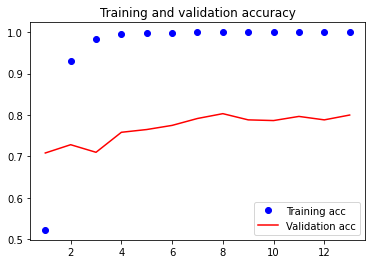

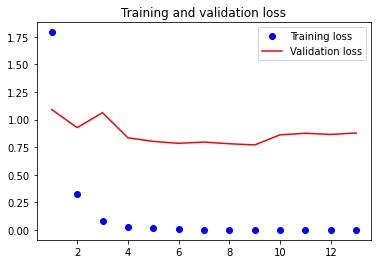

In [ ]:
plot_history(history_no3)

## **fine-tuning: unfreeze block 14**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block14_sepconv1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 38,311,198
Non-trainable params: 16,112,680
_________________________________________________________________


In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "fine_tuning_14_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no4 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 15s 208ms/step - loss: 5.6543e-05 - acc: 1.0000 - val_loss: 0.8084 - val_acc: 0.8017

Epoch 00001: val_acc improved from -inf to 0.80167, saving model to fine_tuning_14_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 12s 197ms/step - loss: 5.6054e-06 - acc: 1.0000 - val_loss: 0.8540 - val_acc: 0.8100

Epoch 00002: val_acc improved from 0.80167 to 0.81000, saving model to fine_tuning_14_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 12s 196ms/step - loss: 1.2035e-06 - acc: 1.0000 - val_loss: 0.8843 - val_acc: 0.8100

Epoch 00003: val_acc did not improve from 0.81000
Epoch 4/100
60/60 [==============================] - 12s 204ms/step - loss: 4.5657e-07 - acc: 1.0000 - val_loss: 0.8901 - val_acc: 0.8100

Epoch 00004: val_acc did not improve from 0.81000
Epoch 5/100
60/60 [==============================] - 12s 204ms/step - loss: 2.4378e-07 - acc: 1.0000 - val_loss: 0.9087 - val_acc: 0.8150

Epoch 00

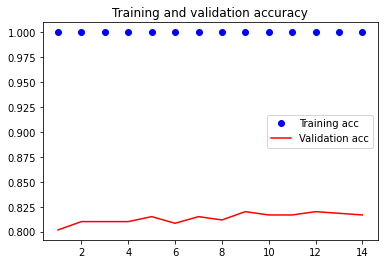

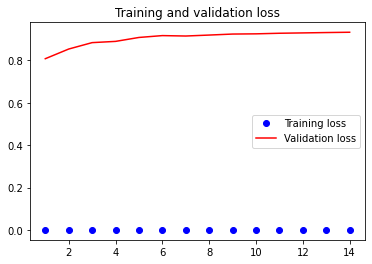

In [ ]:
plot_history(history_no4)

## **fine-tuning: unfreeze block 12**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block12_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 40,888,774
Non-trainable params: 13,535,104
_________________________________________________________________


In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "fine_tuning_12_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no5 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 16s 227ms/step - loss: 6.9172e-05 - acc: 1.0000 - val_loss: 0.8186 - val_acc: 0.7933

Epoch 00001: val_acc improved from -inf to 0.79333, saving model to fine_tuning_12_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 13s 222ms/step - loss: 2.6664e-06 - acc: 1.0000 - val_loss: 0.8548 - val_acc: 0.8100

Epoch 00002: val_acc improved from 0.79333 to 0.81000, saving model to fine_tuning_12_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 13s 224ms/step - loss: 4.3352e-07 - acc: 1.0000 - val_loss: 0.8915 - val_acc: 0.8200

Epoch 00003: val_acc improved from 0.81000 to 0.82000, saving model to fine_tuning_12_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 13s 222ms/step - loss: 1.2904e-07 - acc: 1.0000 - val_loss: 0.8969 - val_acc: 0.8250

Epoch 00004: val_acc improved from 0.82000 to 0.82500, saving model to fine_tuning_12_checkpoint.h5
Epoch 5/100
60/60 [============================

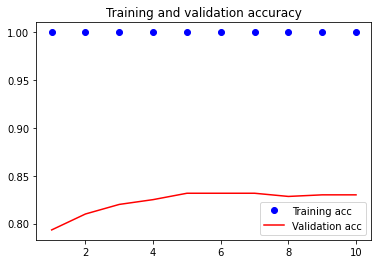

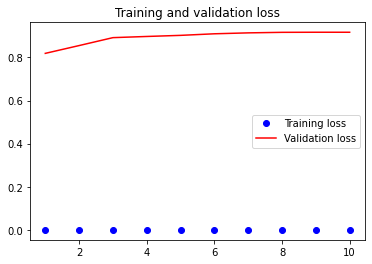

In [ ]:
plot_history(history_no5)

## **fine-tuning: unfreeze block 11**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block11_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 42,502,750
Non-trainable params: 11,921,128
_________________________________________________________________


In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "fine_tuning_11_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no6 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 18s 247ms/step - loss: 9.1212e-05 - acc: 1.0000 - val_loss: 0.8400 - val_acc: 0.8067

Epoch 00001: val_acc improved from -inf to 0.80667, saving model to fine_tuning_11_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 14s 236ms/step - loss: 1.8967e-06 - acc: 1.0000 - val_loss: 0.8658 - val_acc: 0.8100

Epoch 00002: val_acc improved from 0.80667 to 0.81000, saving model to fine_tuning_11_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 14s 237ms/step - loss: 2.7726e-07 - acc: 1.0000 - val_loss: 0.9108 - val_acc: 0.8117

Epoch 00003: val_acc improved from 0.81000 to 0.81167, saving model to fine_tuning_11_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 16s 264ms/step - loss: 8.5235e-08 - acc: 1.0000 - val_loss: 0.9213 - val_acc: 0.8133

Epoch 00004: val_acc improved from 0.81167 to 0.81333, saving model to fine_tuning_11_checkpoint.h5
Epoch 5/100
60/60 [============================

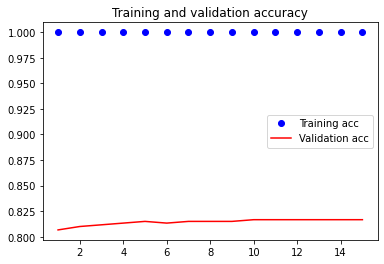

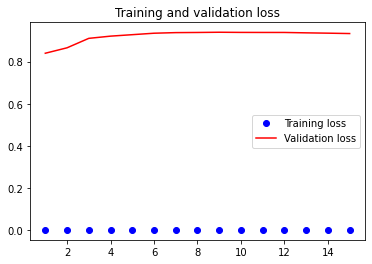

In [ ]:
plot_history(history_no6)

## **fine-tuning: unfreeze block 9**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block9_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 45,730,702
Non-trainable params: 8,693,176
_________________________________________________________________


In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "fine_tuning_9_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no7 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 20s 277ms/step - loss: 1.0231e-04 - acc: 1.0000 - val_loss: 0.8083 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to fine_tuning_9_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 16s 267ms/step - loss: 3.0097e-06 - acc: 1.0000 - val_loss: 0.8832 - val_acc: 0.8083

Epoch 00002: val_acc improved from 0.80000 to 0.80833, saving model to fine_tuning_9_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 16s 268ms/step - loss: 3.6031e-07 - acc: 1.0000 - val_loss: 0.8767 - val_acc: 0.8133

Epoch 00003: val_acc improved from 0.80833 to 0.81333, saving model to fine_tuning_9_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 16s 268ms/step - loss: 8.8016e-08 - acc: 1.0000 - val_loss: 0.8977 - val_acc: 0.8167

Epoch 00004: val_acc improved from 0.81333 to 0.81667, saving model to fine_tuning_9_checkpoint.h5
Epoch 5/100
60/60 [==============================] 

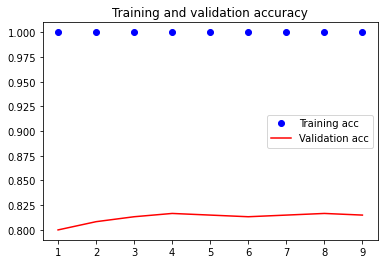

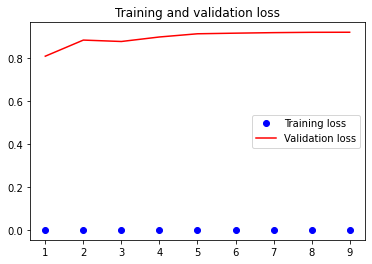

In [ ]:
plot_history(history_no7)

# **With Data augmentaion and Dropout**

## **Random initialization weights**

In [ ]:
# data preparation

# train generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,1.5],
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'train',
    batch_size=20,
    class_mode='categorical')

# validation generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = test_datagen.flow_from_directory(
    'test',
    batch_size=20,
    class_mode='categorical')

Found 1200 images belonging to 30 classes.
Found 600 images belonging to 30 classes.


In [ ]:
# build model

conv_base = keras.applications.Xception(include_top=False,
                                        input_shape=(256, 256, 3),
                                        weights=None)

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
model_no1 = Sequential()
model_no1.add(Input(shape=(256, 256, 3)))
model_no1.add(conv_base)
model_no1.add(Flatten())
model_no1.add(Dropout(0.1))
model_no1.add(Dense(256, activation='relu'))
model_no1.add(Dense(30, activation='softmax'))

model_no1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_1 (ModuleWrap (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_5 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 54,369,350
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model_no1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
path_checkpoint = "aug_random_ini_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no1 = model_no1.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 38s 568ms/step - loss: 9.6446 - acc: 0.0327 - val_loss: 3.4012 - val_acc: 0.0333

Epoch 00001: val_acc improved from -inf to 0.03333, saving model to aug_random_ini_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 33s 555ms/step - loss: 3.4014 - acc: 0.0641 - val_loss: 3.4014 - val_acc: 0.0350

Epoch 00002: val_acc improved from 0.03333 to 0.03500, saving model to aug_random_ini_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 33s 559ms/step - loss: 3.3951 - acc: 0.0537 - val_loss: 3.4012 - val_acc: 0.0317

Epoch 00003: val_acc did not improve from 0.03500
Epoch 4/100
60/60 [==============================] - 34s 560ms/step - loss: 3.3682 - acc: 0.0518 - val_loss: 3.4015 - val_acc: 0.0300

Epoch 00004: val_acc did not improve from 0.03500
Epoch 5/100
60/60 [==============================] - 33s 559ms/step - loss: 3.3171 - acc: 0.0624 - val_loss: 3.4019 - val_acc: 0.0367

Epoch 00005: val_acc improve

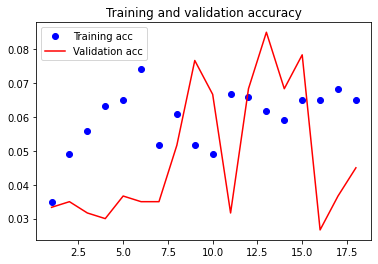

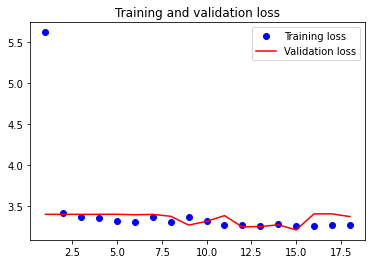

In [ ]:
plot_history(history_no1)

## **Feature Extractor**

In [ ]:
# build model

conv_base = keras.applications.Xception(include_top=False,
                                        input_shape=(256, 256, 3),
                                        weights='imagenet')

conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = conv_base(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(30, activation='softmax')(x)

model_no3 = keras.Model(inputs, outputs)

In [ ]:
conv_base.trainable = False

model_no3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 33,562,398
Non-trainable params: 20,861,480
______________________________________

In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
aug_freeze_path_checkpoint = "aug_feature_extractor_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=aug_freeze_path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no3 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 26s 400ms/step - loss: 2.2804 - acc: 0.3958 - val_loss: 1.3700 - val_acc: 0.6317

Epoch 00001: val_acc improved from -inf to 0.63167, saving model to aug_feature_extractor_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 23s 383ms/step - loss: 1.0284 - acc: 0.7367 - val_loss: 1.0548 - val_acc: 0.7017

Epoch 00002: val_acc improved from 0.63167 to 0.70167, saving model to aug_feature_extractor_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 24s 400ms/step - loss: 0.6919 - acc: 0.8075 - val_loss: 0.8578 - val_acc: 0.7517

Epoch 00003: val_acc improved from 0.70167 to 0.75167, saving model to aug_feature_extractor_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 23s 384ms/step - loss: 0.5353 - acc: 0.8383 - val_loss: 0.8304 - val_acc: 0.7700

Epoch 00004: val_acc improved from 0.75167 to 0.77000, saving model to aug_feature_extractor_checkpoint.h5
Epoch 5/100
60/60 [================

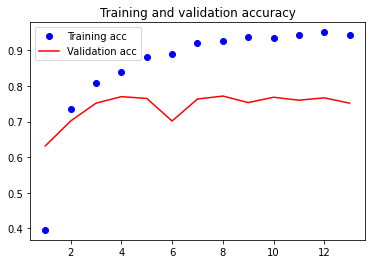

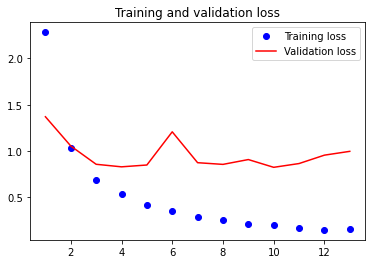

In [ ]:
plot_history(history_no3)

## **fine-tuning: unfreeze block 14**

In [ ]:
model_no3.load_weights(aug_freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block14_sepconv1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 38,311,198
Non-trainable params: 16,112,680
______________________________________

In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "aug_fine_tuning_14_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no4 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 26s 396ms/step - loss: 0.1564 - acc: 0.9542 - val_loss: 0.8397 - val_acc: 0.7800

Epoch 00001: val_acc improved from -inf to 0.78000, saving model to aug_fine_tuning_14_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 23s 387ms/step - loss: 0.1520 - acc: 0.9500 - val_loss: 0.8263 - val_acc: 0.7800

Epoch 00002: val_acc did not improve from 0.78000
Epoch 3/100
60/60 [==============================] - 23s 387ms/step - loss: 0.1322 - acc: 0.9583 - val_loss: 0.8184 - val_acc: 0.7883

Epoch 00003: val_acc improved from 0.78000 to 0.78833, saving model to aug_fine_tuning_14_checkpoint.h5
Epoch 4/100
60/60 [==============================] - 24s 392ms/step - loss: 0.1026 - acc: 0.9717 - val_loss: 0.7485 - val_acc: 0.8117

Epoch 00004: val_acc improved from 0.78833 to 0.81167, saving model to aug_fine_tuning_14_checkpoint.h5
Epoch 5/100
60/60 [==============================] - 24s 393ms/step - loss: 0.1122 - acc: 0.9625 - va

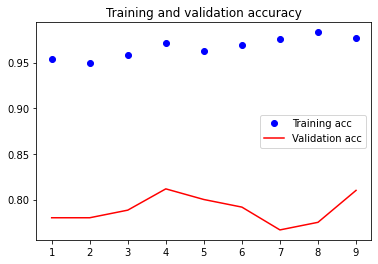

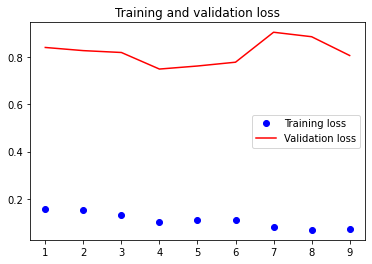

In [ ]:
plot_history(history_no4)

## **fine-tuning: unfreeze block 12**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(aug_freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block12_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 40,888,774
Non-trainable params: 13,535,104
______________________________________

In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "aug_fine_tuning_12_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no5 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 27s 407ms/step - loss: 0.1840 - acc: 0.9442 - val_loss: 0.8243 - val_acc: 0.7800

Epoch 00001: val_acc improved from -inf to 0.78000, saving model to aug_fine_tuning_12_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 24s 396ms/step - loss: 0.1088 - acc: 0.9667 - val_loss: 0.7505 - val_acc: 0.8100

Epoch 00002: val_acc improved from 0.78000 to 0.81000, saving model to aug_fine_tuning_12_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 24s 395ms/step - loss: 0.1038 - acc: 0.9692 - val_loss: 0.8845 - val_acc: 0.7933

Epoch 00003: val_acc did not improve from 0.81000
Epoch 4/100
60/60 [==============================] - 24s 395ms/step - loss: 0.0966 - acc: 0.9700 - val_loss: 0.7899 - val_acc: 0.7983

Epoch 00004: val_acc did not improve from 0.81000
Epoch 5/100
60/60 [==============================] - 24s 395ms/step - loss: 0.0897 - acc: 0.9717 - val_loss: 0.8664 - val_acc: 0.8033

Epoch 00005: val_acc

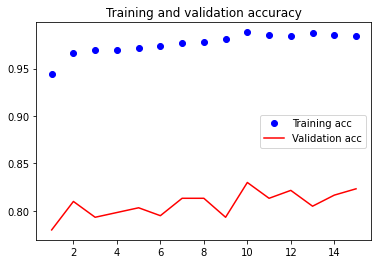

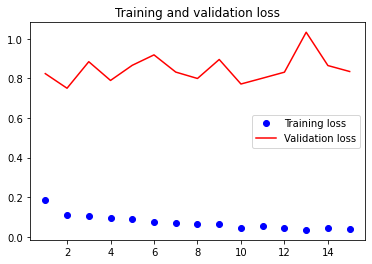

In [ ]:
plot_history(history_no5)

## **fine-tuning: unfreeze block 11**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(aug_freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block11_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 42,502,750
Non-trainable params: 11,921,128
______________________________________

In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "aug_fine_tuning_11_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no6 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 28s 418ms/step - loss: 0.1613 - acc: 0.9558 - val_loss: 0.8125 - val_acc: 0.7833

Epoch 00001: val_acc improved from -inf to 0.78333, saving model to aug_fine_tuning_11_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 24s 400ms/step - loss: 0.1224 - acc: 0.9617 - val_loss: 0.7340 - val_acc: 0.7933

Epoch 00002: val_acc improved from 0.78333 to 0.79333, saving model to aug_fine_tuning_11_checkpoint.h5
Epoch 3/100
60/60 [==============================] - 24s 398ms/step - loss: 0.0909 - acc: 0.9733 - val_loss: 0.8083 - val_acc: 0.7883

Epoch 00003: val_acc did not improve from 0.79333
Epoch 4/100
60/60 [==============================] - 24s 398ms/step - loss: 0.0649 - acc: 0.9817 - val_loss: 1.1056 - val_acc: 0.7850

Epoch 00004: val_acc did not improve from 0.79333
Epoch 5/100
60/60 [==============================] - 24s 398ms/step - loss: 0.0708 - acc: 0.9750 - val_loss: 0.7160 - val_acc: 0.8117

Epoch 00005: val_acc

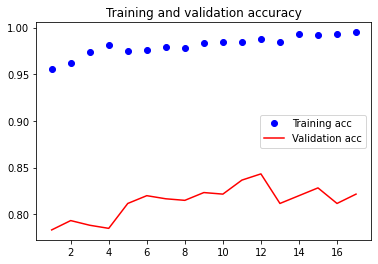

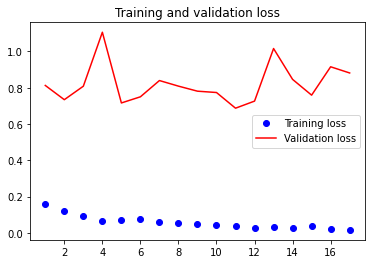

In [ ]:
plot_history(history_no6)

## **fine-tuning: unfreeze block 9**

In [ ]:
conv_base.trainable = False

In [ ]:
model_no3.load_weights(aug_freeze_path_checkpoint)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block9_sepconv3':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
model_no3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout (Dropout)            (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7710      
Total params: 54,423,878
Trainable params: 45,730,702
Non-trainable params: 8,693,176
_______________________________________

In [ ]:
model_no3.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
path_checkpoint = "aug_fine_tuning_9_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_acc",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history_no7 = model_no3.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    steps_per_epoch=60,
                    validation_steps=30,
                    callbacks=[es_callback, modelckpt_callback])

Epoch 1/100
60/60 [==============================] - 30s 427ms/step - loss: 0.1715 - acc: 0.9492 - val_loss: 0.7651 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to aug_fine_tuning_9_checkpoint.h5
Epoch 2/100
60/60 [==============================] - 25s 415ms/step - loss: 0.1119 - acc: 0.9650 - val_loss: 0.8123 - val_acc: 0.7850

Epoch 00002: val_acc did not improve from 0.80000
Epoch 3/100
60/60 [==============================] - 25s 419ms/step - loss: 0.0646 - acc: 0.9808 - val_loss: 0.9148 - val_acc: 0.7883

Epoch 00003: val_acc did not improve from 0.80000
Epoch 4/100
60/60 [==============================] - 25s 416ms/step - loss: 0.0795 - acc: 0.9683 - val_loss: 0.8278 - val_acc: 0.8117

Epoch 00004: val_acc improved from 0.80000 to 0.81167, saving model to aug_fine_tuning_9_checkpoint.h5
Epoch 5/100
60/60 [==============================] - 25s 414ms/step - loss: 0.0738 - acc: 0.9733 - val_loss: 0.7682 - val_acc: 0.8067

Epoch 00005: val_acc d

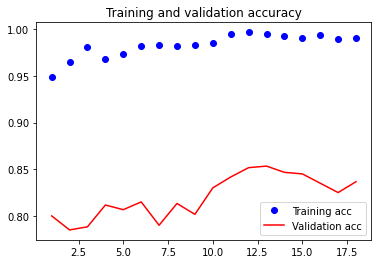

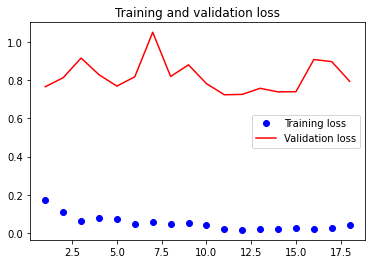

In [ ]:
plot_history(history_no7)